In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_excel("BOF_Data1.xlsx")
df.head()


,CASTNO,CVNO,AIM_C,AIM_P,AIM_TEMP,HM_TEMP,HM_C,HM_SI,HM_P,HM_S,...,TAPENDTOBLOWSTART,BATH_HT,VSL_LIFE,RETAINED_SLAG_WT,TBM,ACT_ORE,ACT_LIME,ACT_DOLO,ACT_TEMP,TAP_END
0,T17086,2.0,0.065,0.025,1640,1371,4.61,0.8010,0.1600,0.0170,...,15,345.0,1258,1,6,2050,7010,2075,0,NaT
1,T17084,2.0,0.060,0.025,1640,1392,4.66,0.5250,0.1530,0.0170,...,12,355.0,1257,1,6,2820,7103,2083,1626,2025-03-21 16:28:29
2,T17083,1.0,0.065,0.025,1625,1286,4.41,0.4680,0.1610,0.0180,...,19,293.0,4686,1,7,329,6707,3172,1640,2025-03-21 16:03:02
3,T17082,2.0,0.060,0.025,1640,1300,4.41,0.4677,0.1606,0.0179,...,24,351.0,1256,1,6,1143,7013,2043,1642,2025-03-21 15:49:33
4,T17081,1.0,0.065,0.025,1625,1334,4.49,0.6220,0.1470,0.0170,...,62,292.0,4685,1,6,1242,7319,3135,1648,2025-03-21 15:16:01


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17922 entries, 0 to 17921
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CASTNO             17922 non-null  object        
 1   CVNO               17921 non-null  float64       
 2   AIM_C              17922 non-null  float64       
 3   AIM_P              17922 non-null  float64       
 4   AIM_TEMP           17922 non-null  int64         
 5   HM_TEMP            17922 non-null  int64         
 6   HM_C               17922 non-null  float64       
 7   HM_SI              17922 non-null  float64       
 8   HM_P               17922 non-null  float64       
 9   HM_S               17809 non-null  float64       
 10  HM_MN              17809 non-null  float64       
 11  HM_WT              17922 non-null  float64       
 12  WRP_SCP            17922 non-null  float64       
 13  WRP_C              17922 non-null  float64       
 14  WRP_SI

In [5]:
df = df.drop(columns=["CASTNO", "TAP_END"])


In [6]:
df.isnull().sum().sort_values(ascending=False).head(10)


HM_S         113
HM_MN        113
BATH_HT       19
CVNO           1
FS_S           0
PLD_MN         0
PLD_P          0
PLD_S          0
PLD_FE         0
OTHER_SCP      0
dtype: int64

In [7]:
df.fillna(df.mean(), inplace=True)


In [8]:
X = df.drop(columns=["ACT_TEMP"])
y = df["ACT_TEMP"]


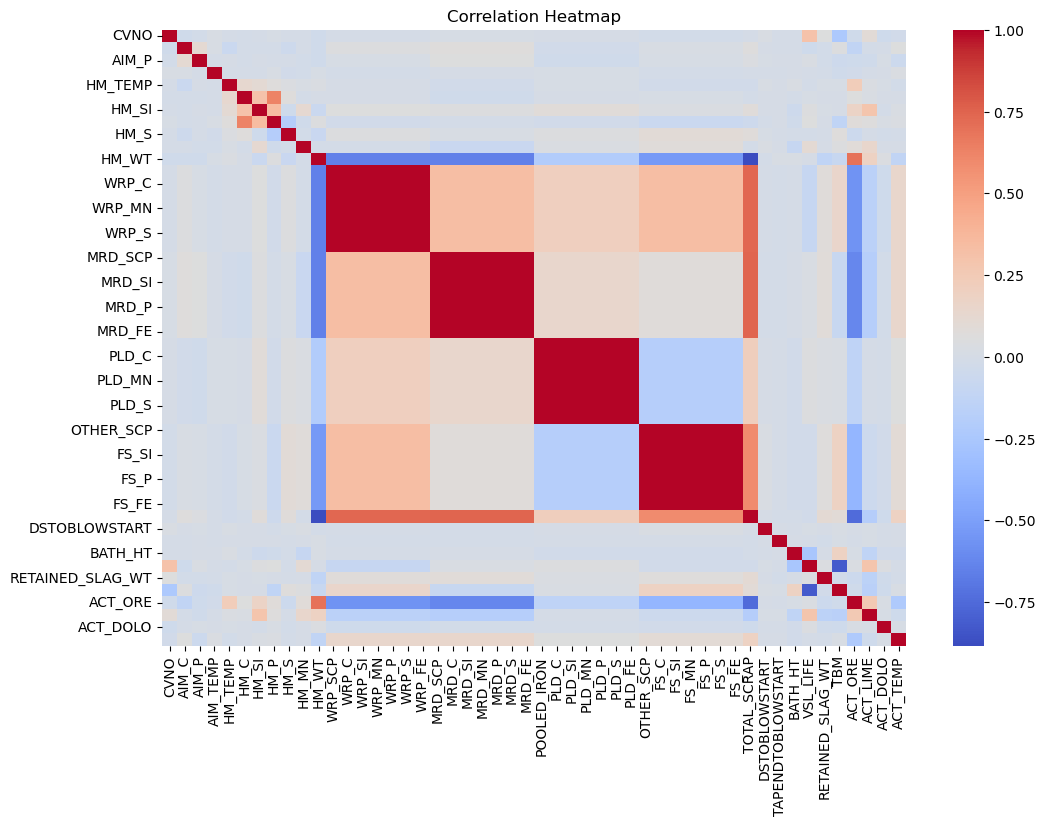

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [14]:
def evaluate(y_true, y_pred):
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))


In [29]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10)


ACT_LIME         0.480667
DSTOBLOWSTART    0.086265
AIM_TEMP         0.064928
HM_TEMP          0.046481
BATH_HT          0.046178
ACT_ORE          0.044572
VSL_LIFE         0.043187
ACT_DOLO         0.042900
HM_WT            0.033757
TOTAL_SCRAP      0.019603
dtype: float64

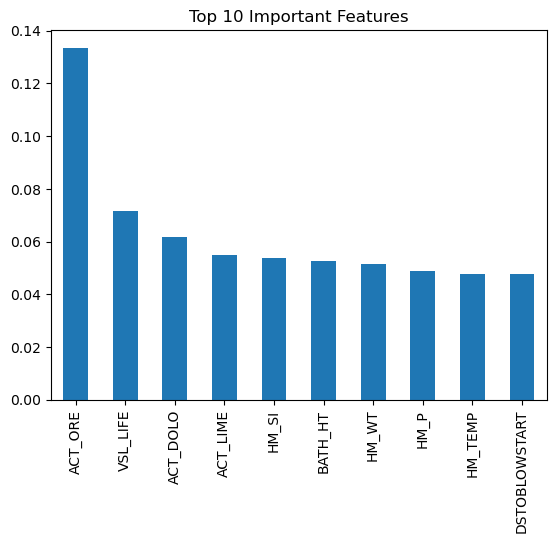

In [18]:
importance.sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Important Features")
plt.show()


In [20]:
(df["ACT_TEMP"] == 0).sum()


2871

In [21]:
df = df[df["ACT_TEMP"] > 1000]


In [22]:
low_variance_cols = df.columns[df.std() < 1]
df = df.drop(columns=low_variance_cols)


In [23]:
X = df.drop(columns=["ACT_TEMP"])
y = df["ACT_TEMP"]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [26]:
evaluate(y_test, y_pred)


MAE : 16.114548048095333
MSE : 470.609183447777
RMSE: 21.693528607577353
R2  : 0.09655096627714188


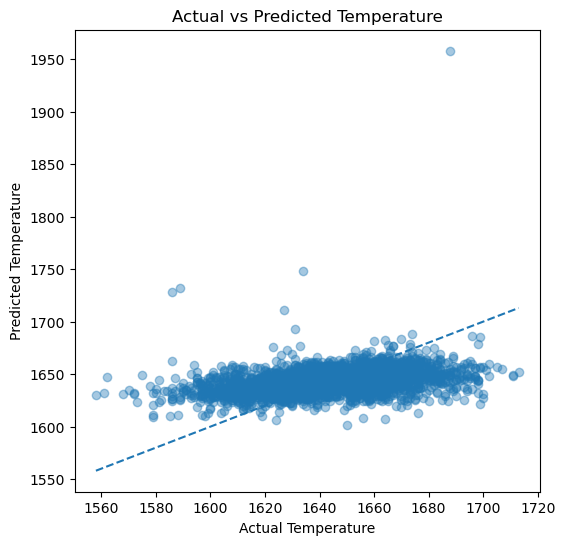

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()


In [28]:
sample = X.iloc[[0]]
predicted_temp = rf.predict(sample)

print("Predicted Temperature:", predicted_temp[0])
print("Actual Temperature   :", y.iloc[0])

Predicted Temperature: 1638.5091783934013
Actual Temperature   : 1626
